In [1]:
# Setup stuff for plotting, etc...
using PyPlot

INFO: Loading help data...


Why WiBreathe doesn't work with DSSS packets
========================================================

In WiBreathe, we had a very special situation: we transmitted a sinusoidal signal in a multipath environment, and measured the rate of change of the multipath components indirectly by estimating the small-scale fading of the environment.  DSSS screws that up with its phase shifts, unfortunately.


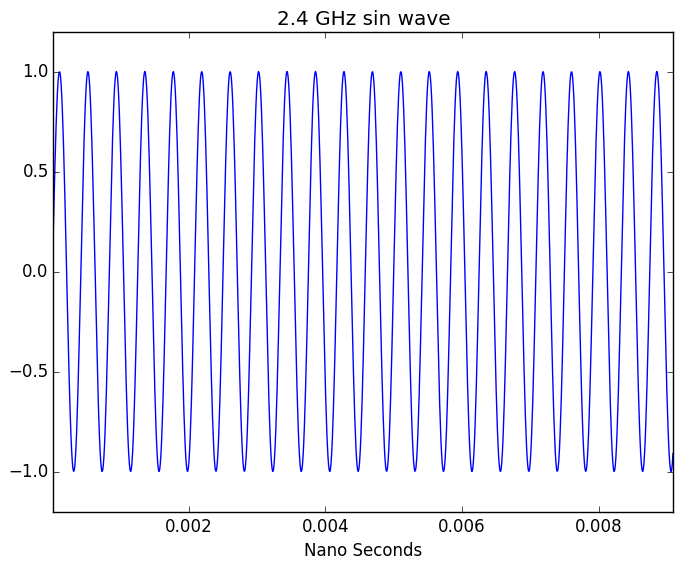

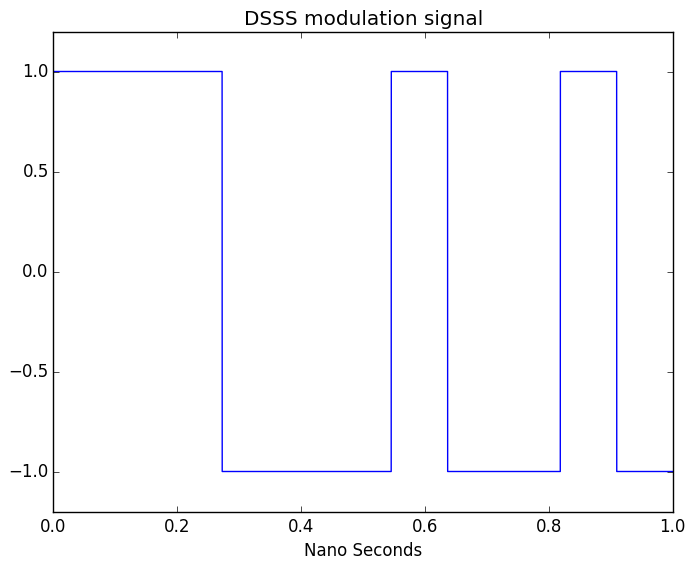

In [2]:
# Sample high so that we can see beautiful sin waves
fs = 110.0e9
barker_len = fs/1e6
t = [1:barker_len]/fs

# Define rep() to repeat elements in a vector
rep(v, n) = [v[div(i,n)+1] for i=0:n*length(v)-1]

# Generate a sinusoid at this frequency
f_c = 2.4e9
x_sin = sin(2*pi*f_c*t)

# Modulate by barker-11 code
barker11 = [1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1]
x_dsss = rep(barker11, fs/11e6)

#println("length(x_dsss): $(length(x_dsss))")
#println("length(t): $(length(t))")

figure();
plot(1e6*t[1:1000], x_sin[1:1000])
xlim(1e6*t[1], 1e6*t[1000])
ylim(-1.2, 1.2)
xlabel("Nano Seconds")
title("2.4 GHz sin wave")

figure()
plot(1e6*t, x_dsss)
xlim(1e6*t[1], 1e6*t[end])
ylim(-1.2, 1.2)
xlabel("Nano Seconds")
title("DSSS modulation signal");

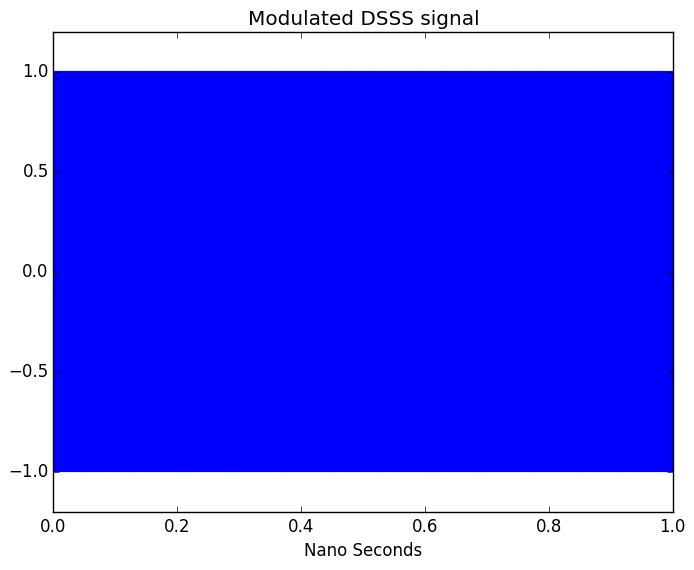

In [3]:
x_mod = x_sin .* x_dsss

figure()
plot(1e6*t, x_mod)
xlim(1e6*t[1], 1e6*t[end])
ylim(-1.2, 1.2)
xlabel("Nano Seconds")
title("Modulated DSSS signal");

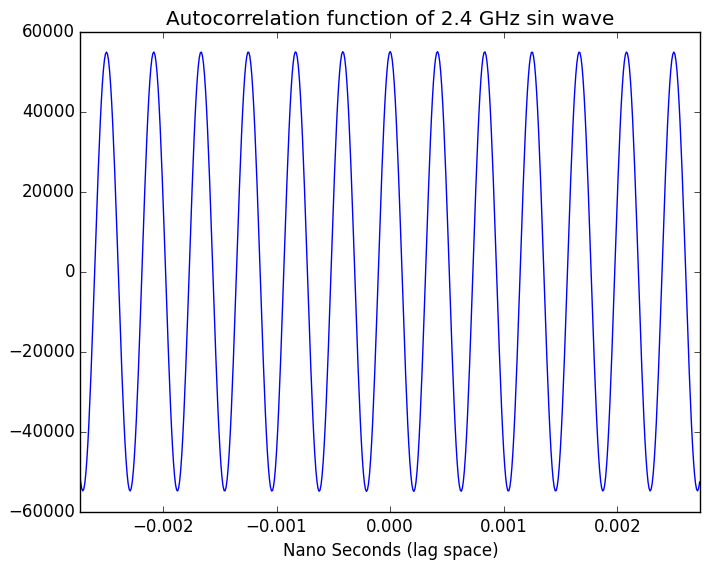

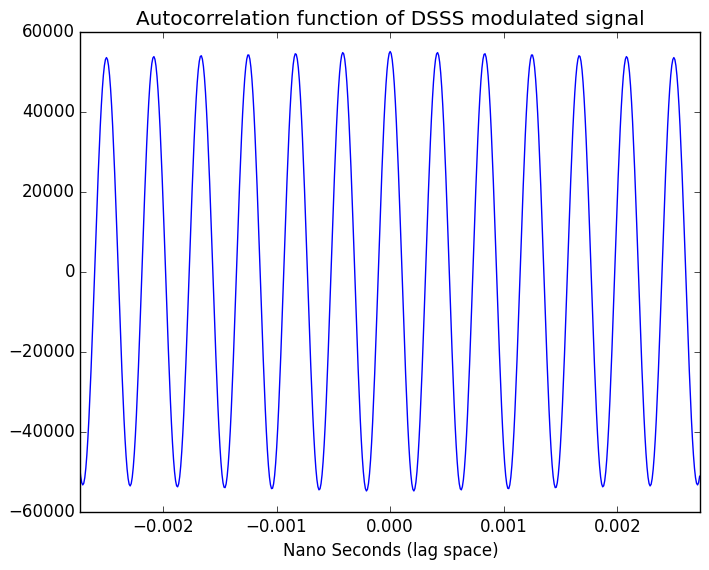

In [4]:
r_t = [-barker_len+1:barker_len-1]/fs
r_sinsin = xcorr(x_sin, x_sin)
r_dsssdsss = xcorr(x_mod, x_mod)

figure()
idxs_short = [floor(length(r_t)/2)-300 : ceil(length(r_t)/2)+300]
plot(1e6*r_t[idxs_short], r_sinsin[idxs_short])
xlim(1e6*r_t[idxs_short[1]], 1e6*r_t[idxs_short[end]])
xlabel("Nano Seconds (lag space)")
title("Autocorrelation function of 2.4 GHz sin wave");

figure()
plot(1e6*r_t[idxs_short], r_dsssdsss[idxs_short])
xlim(1e6*r_t[idxs_short[1]], 1e6*r_t[idxs_short[end]])
xlabel("Nano Seconds (lag space)")
title("Autocorrelation function of DSSS modulated signal");

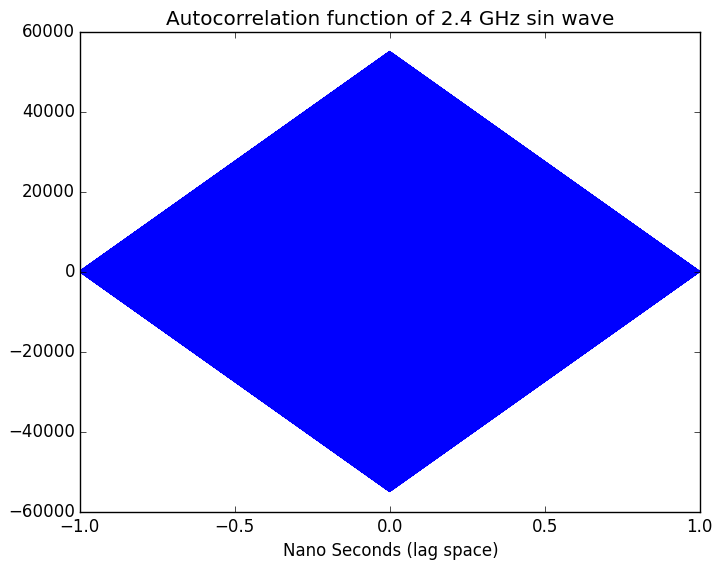

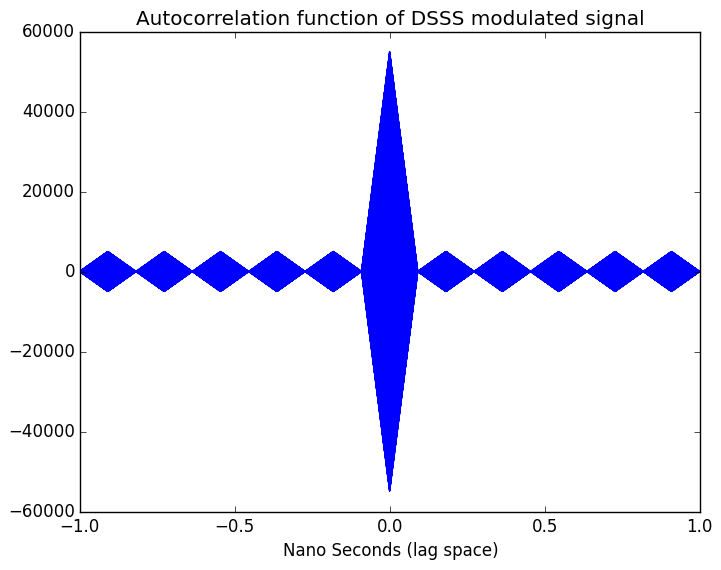

In [5]:
figure()
plot(1e6*r_t, r_sinsin)
xlim(1e6*r_t[1], 1e6*r_t[end])
xlabel("Nano Seconds (lag space)")
title("Autocorrelation function of 2.4 GHz sin wave");

figure()
plot(1e6*r_t, r_dsssdsss)
xlim(1e6*r_t[1], 1e6*r_t[end])
xlabel("Nano Seconds (lag space)")
title("Autocorrelation function of DSSS modulated signal");

In [19]:
#using Interact

function delay_and_sum(x, y, tau)
    #println("$(length(x[tau:end])), $(length(y[1:end-tau]))")
    return sum(x[tau:end] + y[1:end-tau+1]);
end

#@manipulate for tau=0:100
figure()
y_sin = [delay_and_sum(x_sin[1:1000], x_sin[1:1000], tau) for tau in 1:10000]
plot(1e6*t[1:1000], y_sin)
xlim(1e6*t[1], 1e6*t[1000])
xlabel("Nano Seconds (lag space)")
title("Delay-and-add of DSSS modulated signal");


figure()
y_dsss = [delay_and_sum(x_dsss[1:10000], x_dsss[1:10000], tau) for tau in 1:10000]
plot(1e6*t[1:10000], y_dsss)
xlim(1e6*t[1], 1e6*t[10000])
xlabel("Nano Seconds (lag space)")
title("Delay-and-add of DSSS modulated signal");
#end

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension',)
  File "/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3093, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1373, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 303, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 281, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[19], in expression starting on line 11